In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


['/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0000.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0001.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0002.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0003.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0004.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0005.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0006.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0007.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0008.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0009.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0010.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0011.npy', '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coro

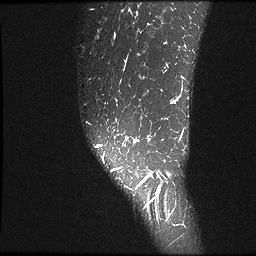

(256, 256, 3)


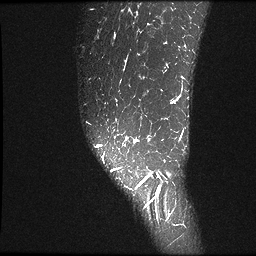

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


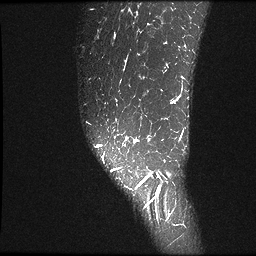

In [0]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

paths =[ "/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/"
        ,"/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/axial/","/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/sagittal/"]
all_data = []
# directory=[]
a=[]
for path in paths:
  directory=[]
  for r, d, f in os.walk(path):
      for file in f:
          if '.npy' in file:
            
              directory.append(os.path.join(r, file))
  directory.sort()          
  all_data.append(directory)
#   print(type(directory[0]))
  print(directory)
# print(all_data[2].sort())
# for f in files:
#     print(f)



def to_rgb(img,i):
    img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) 
#     print(img.shape)
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    if i==0:
      print(img.shape)
      cv2_imshow(img)
      print(img_rgb.shape)
      cv2_imshow(img_rgb)
#     img_rgb.shape
#     img_rgb=np.swapaxes(img_rgb,0,2)

#     print(img_rgb.shape)
    return img_rgb

# coronal=np.zeros(shape=(16649,256,256,3),dtype='uint8')
# coronalList=[]
sizes=[]
sagittalList=[]
k=0
# sagittalList=[]
for i in range(len(all_data[2])):
  print(i)
  a=np.load(all_data[2][i])
  f,j,k=a.shape
  sizes.append(f//2)
  for j in range(f//2):
    b=to_rgb(a[j],i+j)
    sagittalList.append(b)
#     coronal[k]=b
#     if i+j==0:
#       cv2_imshow(coronal[k])

  
    k+=1
    
sagittal=np.asarray(sagittalList,dtype='uint8')
sagittalList=None
    
print(sagittal.shape)
cv2_imshow(sagittal[0])


In [0]:
#Getting labels
import pandas as pd
import numpy as np
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"])

data1 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-abnormal.csv") 
data2 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-acl.csv") 
data3 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-meniscus.csv") 
print(data1.shape)
print(data2.shape)
print(data3.shape)
# print(data1.columns)
# print(data1['1'])
y1=np.array(data1["1"])
y2=np.array(data2["0"])
y3=np.array(data3["0"])
print("---------------------------------")


(1129, 2)
(1129, 2)
(1129, 2)
---------------------------------


In [0]:
y1=np.hstack(('1',y1))
y2=np.hstack(('0',y2))
y3=np.hstack(('0',y3))
# print(y)
Y_train1=[]
Y_train2=[]
Y_train3=[]
for i in range(len(sizes)):
  for j in range(sizes[i]):
    Y_train1.append(y1[i])
    Y_train2.append(y2[i])
    Y_train3.append(y3[i])
 
Y_train1=np.asarray(Y_train1)
Y_train2=np.asarray(Y_train2)
Y_train3=np.asarray(Y_train3)
print(Y_train1.shape);print(Y_train2.shape);print(Y_train3.shape)
# print(data1[:][1])
# labels=data1[1]
# print(labels)
#Convert labels into 2 columns
Y_train_1=np.zeros(shape=(len(Y_train1),2));Y_train_2=np.zeros(shape=((len(Y_train1),2)))
Y_train_3=np.zeros(shape=((len(Y_train1),2)))
for i in range(len(Y_train1)):
  if Y_train1[i] == '1':
    Y_train_1[i][1]=1
  elif Y_train1[i] == '0':
    Y_train_1[i][0]=1
  if Y_train2[i] == '1':
    Y_train_2[i][1]=1
  elif Y_train2[i] == '0':
    Y_train_2[i][0]=1
  if Y_train3[i] == '1':
    Y_train_3[i][1]=1
  elif Y_train3[i] == '0':
    Y_train_3[i][0]=1
#Y_train
Y_train_3

(17003,)
(17003,)
(17003,)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#ResNet 50 with weights training 

In [0]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
import keras
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


#sagittal abnormal 

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model2 = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model2.layers[:-3]:
  layer.trainable=False
for layer in model2.layers[-3:]:
  layer.trainable=True
for layer in model2.layers:
  print(layer.trainable)
model2.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])
print(model2.summary)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

In [0]:
filepath = '/content/gdrive/My Drive/sagittal_abnormal.5.wts.h5'
history=model2.fit(sagittal,
    Y_train_1,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)

Instructions for updating:
Use tf.cast instead.
Train on 11902 samples, validate on 5101 samples
Epoch 1/10
 - 91s - loss: 0.5667 - acc: 0.7910 - val_loss: 0.7908 - val_acc: 0.8120
Epoch 2/10
 - 84s - loss: 0.5006 - acc: 0.8154 - val_loss: 0.6993 - val_acc: 0.8120
Epoch 3/10
 - 84s - loss: 0.4732 - acc: 0.8136 - val_loss: 0.7349 - val_acc: 0.8120
Epoch 4/10
 - 84s - loss: 0.4529 - acc: 0.8208 - val_loss: 0.7647 - val_acc: 0.8120
Epoch 5/10


#sagittal acl 

In [0]:
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model3 = Model(inputs = base_model.input, outputs = predictions)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model2.layers[:-3]:
  layer.trainable=False
for layer in model2.layers[-3:]:
  layer.trainable=True

model3.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
filepath = '/content/gdrive/My Drive/sagittal_acl.5.wts.h5'
history=model3.fit(sagittal,
    Y_train_2,
    batch_size=32,
    epochs=10,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)

Train on 11902 samples, validate on 5101 samples
Epoch 1/10
 - 231s - loss: 0.5377 - acc: 0.7836 - val_loss: 0.4788 - val_acc: 0.8281
Epoch 2/10
 - 214s - loss: 0.3489 - acc: 0.8546 - val_loss: 0.6734 - val_acc: 0.7491
Epoch 3/10
 - 214s - loss: 0.1713 - acc: 0.9344 - val_loss: 1.0001 - val_acc: 0.5946
Epoch 4/10
 - 214s - loss: 0.0972 - acc: 0.9626 - val_loss: 1.0965 - val_acc: 0.7351


In [0]:
print(model2.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model3 = Model(inputs = base_model.input, outputs = predictions)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model2.layers[:-3]:
  layer.trainable=False
for layer in model2.layers[-3:]:
  layer.trainable=True

model3.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
filepath = '/content/gdrive/My Drive/sagittal_meniscus.5.wts.h5'
history=model2.fit(sagittal,
    Y_train_3,
    batch_size=32,
    epochs=10,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)

Train on 11902 samples, validate on 5101 samples
Epoch 1/10


KeyboardInterrupt: ignored

# ResNet50

In [0]:
# You will learn how to build very deep convolutional networks, using Residual Networks (ResNets)
# In theory, very deep networks can represent very complex functions; but in practice, they are hard to train. Residual Networks, introduced by He et al., allow you to train much deeper networks than were previously practically feasible.

# Let's import packages
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

# Identity block

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size=(f,f), strides = (1,1), padding='same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size=(1,1), strides = (1,1), padding="valid", name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    
    return X
# The convolutional block
# GRADED FUNCTION: convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters = F1, kernel_size= (1, 1), strides = (s,s),padding="valid", name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    

    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size=(f,f), strides=(1,1), name = conv_name_base + '2b', padding="same",kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name= bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size=(1,1), strides = (1,1), name= conv_name_base + '2c',padding="valid", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size= (1,1), strides=(s,s), name=conv_name_base + '1', padding="valid", kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)
    
    
    return X

# ResNet 50

def ResNet50(input_shape = (256, 256, 3), classes = 2):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(256, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    # Stage 3
    X = convolutional_block(X, f=3, filters = [128,128,512], stage = 3, block='a', s=2)
    X = identity_block(X, 3, filters = [128,128,512],stage=3, block='b')
    X = identity_block(X, 3, filters = [128,128,512], stage=3, block='c')
    X = identity_block(X, 3, filters = [128,128,512], stage =3, block='d')

    # Stage 4 
    X = convolutional_block(X, f=3, filters = [256,256,1024],stage=4, block='a', s=2)
    X = identity_block(X, 3, filters = [256,256,1024], stage=4, block='b')
    X = identity_block(X, 3, filters = [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, filters= [256,256,1024], stage=4, block='d')
    X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='e')
    X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f=3, filters=[256,256,2048], stage=5,block='a', s=3)
    X = identity_block(X, 3, filters=[256,256,2048], stage=5, block='b')
    X = identity_block(X,3, filters=[256,256,2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name='avg_pool')(X)
    

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    #WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
    #weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
    #model.load_weights()
    #model.load_weights(weights_path,by_name=True)
    

    return model

Using TensorFlow backend.


In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2

epochs = 10
batch = 128
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
#WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
#weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
#base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))
#weights= 'imagenet'
#x = base_model.output
#x = GlobalAveragePooling2D()(x)
#x = Dropout(0.7)(x)
#predictions = Dense(num_classes, activation= 'softmax')(x)

#sagital_model.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
#sagital_model = Model(inputs = base_model.input, outputs = predictions)
#sagital_model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

#coronal_model = Model(inputs = base_model.input, outputs = predictions)
#coronal_model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])
# The implemented from scratch model ( Better )
# Done compiling
sagittal_model1 = ResNet50(input_shape = (256, 256, 3), classes = num_classes)
sagittal_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
sagittal_model2 = ResNet50(input_shape = (256, 256, 3), classes = num_classes)
sagittal_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
sagittal_model3 = ResNet50(input_shape = (256, 256, 3), classes = num_classes)
sagittal_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Done compiling our models')
#axial_model = Model(inputs = base_model.input, outputs = predictions)
#axial_model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])


Done compiling our models


# Train

In [0]:
#The fitting step 
sagittal_model1.fit(sagittal, Y_train_1, epochs = epochs, batch_size = 64,validation_split=0.05)
print('Abnormal Training is done')


Train on 16152 samples, validate on 851 samples
Epoch 1/10
16152/16152 [==============================] - 231s 14ms/step - loss: 3.1013 - acc: 0.8050 - val_loss: 2.4865 - val_acc: 0.8449
Epoch 2/10
16152/16152 [==============================] - 225s 14ms/step - loss: 3.1064 - acc: 0.8062 - val_loss: 2.4865 - val_acc: 0.8449
Epoch 3/10
16152/16152 [==============================] - 225s 14ms/step - loss: 3.1064 - acc: 0.8062 - val_loss: 2.4865 - val_acc: 0.8449
Epoch 4/10
16152/16152 [==============================] - 225s 14ms/step - loss: 3.1064 - acc: 0.8062 - val_loss: 2.4865 - val_acc: 0.8449
Epoch 5/10
16152/16152 [==============================] - 224s 14ms/step - loss: 3.1064 - acc: 0.8062 - val_loss: 2.4865 - val_acc: 0.8449
Epoch 6/10
16152/16152 [==============================] - 224s 14ms/step - loss: 3.1064 - acc: 0.8062 - val_loss: 2.4865 - val_acc: 0.8449
Epoch 7/10
16152/16152 [==============================] - 224s 14ms/step - loss: 3.1064 - acc: 0.8062 - val_loss: 2.48

In [0]:
sagittal_model2.fit(sagittal, Y_train_2, epochs = 5, batch_size = 32)
print('ACL Training is done')

Epoch 1/5
17003/17003 [==============================] - 256s 15ms/step - loss: 2.9717 - acc: 0.8137
Epoch 2/5
17003/17003 [==============================] - 243s 14ms/step - loss: 2.9764 - acc: 0.8143
Epoch 3/5
17003/17003 [==============================] - 243s 14ms/step - loss: 2.9764 - acc: 0.8143
Epoch 4/5
17003/17003 [==============================] - 243s 14ms/step - loss: 2.9764 - acc: 0.8143
Epoch 5/5
17003/17003 [==============================] - 243s 14ms/step - loss: 2.9764 - acc: 0.8143
ACL Training is done
